### Multiple Linear Regression - overall_survival_months

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Data/df_clinical_survival_time_ML.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,radio_therapy,tumor_size,tumor_stage,encoded_type_of_breast_surgery,encoded_cancer_type_detailed,encoded_cellularity,encoded_pam50_+_claudin-low_subtype,encoded_er_status,encoded_her2_status,encoded_tumor_other_histologic_subtype,encoded_inferred_menopausal_state,encoded_integrative_cluster,encoded_pr_status
1,43.19,0,3.0,1,0,2.0,84.633333,1,10.0,1.0,0,1,0,2,1,0,0,1,4,1
2,48.87,1,2.0,1,1,2.0,163.700000,0,15.0,2.0,1,1,0,3,1,0,0,1,3,1
3,47.68,1,2.0,1,3,1.0,164.933333,1,25.0,2.0,1,4,2,3,1,0,4,1,10,1
4,76.97,1,3.0,1,8,2.0,41.366667,1,40.0,2.0,1,4,0,3,1,0,4,0,10,1
5,78.77,0,3.0,1,0,4.0,7.800000,1,31.0,4.0,1,1,2,3,1,0,0,0,8,1


In [3]:
# Assign the data to X and y
X = df.loc[:, df.columns != 'overall_survival_months']
y = df['overall_survival_months'].values.reshape(-1,1)
print(X.shape,y.shape)

(1017, 19) (1017, 1)


In [4]:
# Use train_test_split to create training and testing data, use test size 0.2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [5]:
# Scaling is proabably optional for linear regression
from sklearn.preprocessing import StandardScaler
#get scaler on the raw data
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [6]:
# Create thee model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_scaled,y_train_scaled)
training_score = model.score(X_train_scaled,y_train_scaled)
testing_score = model.score(X_test_scaled,y_test_scaled)

print(f'Training Score: {training_score}.')
print(f'Testing Score: {testing_score}.')

Training Score: 0.16926963028176922.
Testing Score: 0.169350279061123.


Text(0.5, 1.0, 'residual plot')

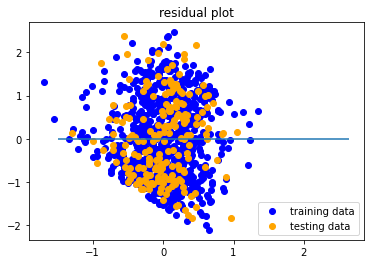

In [8]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_scaled),y_train_scaled - model.predict(X_train_scaled),c='blue',label = "training data")
plt.scatter(model.predict(X_test_scaled),y_test_scaled - model.predict(X_test_scaled),c='orange',label = "testing data")
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=y_test_scaled.min(),xmax=y_test_scaled.max())
plt.title("residual plot")

In [9]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8471018628276956, R2: 0.169350279061123


In [10]:
predictions_original = y_scaler.inverse_transform(predictions)
predictions_original

array([[194.87821317],
       [170.64380785],
       [147.44909325],
       [ 81.50302916],
       [131.56916816],
       [120.71904383],
       [143.99019061],
       [ 83.69121648],
       [103.59659438],
       [103.88202578],
       [147.71892222],
       [101.24599544],
       [ 87.66922233],
       [134.45525392],
       [171.97125024],
       [ 56.19954417],
       [141.95806784],
       [ 73.40390365],
       [124.42638662],
       [110.74574425],
       [ 52.16505005],
       [146.48190635],
       [128.0005775 ],
       [141.81900567],
       [183.54911389],
       [150.64608313],
       [133.70273867],
       [159.00058932],
       [175.01681414],
       [128.11188414],
       [124.61300564],
       [164.10393362],
       [138.41843585],
       [146.85645148],
       [136.94942955],
       [120.74251466],
       [154.28104764],
       [ 99.80623345],
       [110.15042688],
       [128.87289863],
       [ 58.48376971],
       [112.73107283],
       [ 87.09097182],
       [150

In [11]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [12]:
Predicted_Survival_Months = flatten(predictions_original.tolist())
Actual_Survival_Months = flatten(y_test.tolist())
Error = [p - a for p, a in zip(Predicted_Survival_Months,Actual_Survival_Months)]

In [13]:
pd.DataFrame({"Predicted Survival Months":Predicted_Survival_Months,
              "Actual Survival Months":Actual_Survival_Months,
             "Error": Error}).head(20)

,Predicted Survival Months,Actual Survival Months,Error
0,194.878213,205.600000,-10.721787
1,170.643808,199.300000,-28.656192
2,147.449093,69.800000,77.649093
3,81.503029,55.933333,25.569696
4,131.569168,259.766667,-128.197499
5,120.719044,50.233333,70.485711
6,143.990191,21.600000,122.390191
7,83.691216,30.933333,52.757883
8,103.596594,98.833333,4.763261
9,103.882026,140.066667,-36.184641


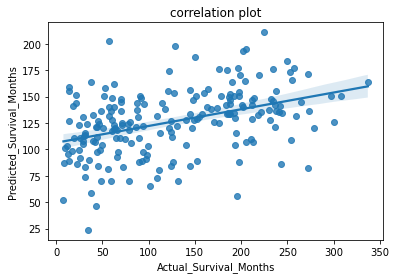

In [14]:
# Plot the correlation plot
import seaborn as sns
sns.regplot(x= Actual_Survival_Months,y= Predicted_Survival_Months)
plt.xlabel("Actual_Survival_Months")
plt.ylabel("Predicted_Survival_Months")
plt.title("correlation plot")
plt.show()

In [19]:
# get importance
importance = model.coef_[0]
sorted(zip(importance,X.columns),reverse = True)

[(0.14916951259552053, 'encoded_tumor_other_histologic_subtype'),
 (0.06894963907029687, 'encoded_er_status'),
 (0.0555939629392558, 'mutation_count'),
 (0.044262730474907794, 'encoded_pr_status'),
 (0.02468051064608951, 'encoded_cellularity'),
 (0.018303641698198363, 'encoded_pam50_+_claudin-low_subtype'),
 (0.016981991727407383, 'radio_therapy'),
 (0.014403955418224547, 'encoded_integrative_cluster'),
 (-0.014647606981572013, 'neoplasm_histologic_grade'),
 (-0.03576106844901639, 'encoded_type_of_breast_surgery'),
 (-0.05770538957252064, 'chemotherapy'),
 (-0.06760847650432178, 'encoded_inferred_menopausal_state'),
 (-0.0690987092655018, 'encoded_her2_status'),
 (-0.07978438161078902, 'hormone_therapy'),
 (-0.08132852119801717, 'tumor_size'),
 (-0.08440266166597665, 'encoded_cancer_type_detailed'),
 (-0.0925790337835438, 'lymph_nodes_examined_positive'),
 (-0.10870662902264848, 'tumor_stage'),
 (-0.1897905548346976, 'age_at_diagnosis')]

### Multiple Linear Regression prediction on the survival time is weak, with high error.
### However, the following features are the top 5 most important for predicting the survival outcome (based on the absolute values of the coefficients) :
- age_at_diagnosis
- encoded_tumor_other_histologic_subtype
- tumor_stage
- lymph_nodes_examined_positive
- encoded_cancer_type_detailed